# ASSIGNMENT 2

## SVM, DECISION TREES AND BOOSTING ALGORITHMS

### Apurva Agrawal [axa177331]



### Imporitng Libraries

In [214]:
import csv
import numpy as np
import pandas as pd 

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import zero_one_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier

from os import system

import graphviz

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [215]:
sns.set(style="whitegrid")

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


### DATASET 1 : STUDENT PERFORMANCE

In [216]:
raw_data=pd.read_csv("student-mat.csv", sep=';')
raw_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [217]:
#numeric columns
raw_num = raw_data.select_dtypes(exclude=[object])
#categorical columns
raw_cat = raw_data.select_dtypes(include=[object])
#creating dummies for categorical columns
raw_enc = pd.get_dummies(raw_cat)
#joining to get raw_data with dummies
raw_dum = raw_num.join(raw_enc)
#dropping G1 and G2
data_g3=raw_dum.drop(['G1','G2'], axis=1)
data_g3.head()

#feature scaling (not G3)
scaler = MinMaxScaler()
data_g3[['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences']] =scaler.fit_transform(data_g3[['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences']])
data_g3.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,0.428571,1.00,1.00,0.333333,0.333333,0.0,0.75,0.50,0.75,0.00,...,1,0,0,1,0,1,1,0,1,0
1,0.285714,0.25,0.25,0.000000,0.333333,0.0,1.00,0.50,0.50,0.00,...,1,0,1,0,0,1,0,1,1,0
2,0.000000,0.25,0.25,0.000000,0.333333,1.0,0.75,0.50,0.25,0.25,...,1,0,0,1,0,1,0,1,1,0
3,0.000000,1.00,0.50,0.000000,0.666667,0.0,0.50,0.25,0.25,0.00,...,0,1,0,1,0,1,0,1,0,1
4,0.142857,0.75,0.75,0.000000,0.333333,0.0,0.75,0.50,0.25,0.00,...,1,0,0,1,0,1,1,0,1,0


In [218]:
df_X = data_g3.drop(['G3'],axis=1)
df_X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,0.428571,1.00,1.00,0.333333,0.333333,0.0,0.75,0.50,0.75,0.00,...,1,0,0,1,0,1,1,0,1,0
1,0.285714,0.25,0.25,0.000000,0.333333,0.0,1.00,0.50,0.50,0.00,...,1,0,1,0,0,1,0,1,1,0
2,0.000000,0.25,0.25,0.000000,0.333333,1.0,0.75,0.50,0.25,0.25,...,1,0,0,1,0,1,0,1,1,0
3,0.000000,1.00,0.50,0.000000,0.666667,0.0,0.50,0.25,0.25,0.00,...,0,1,0,1,0,1,0,1,0,1
4,0.142857,0.75,0.75,0.000000,0.333333,0.0,0.75,0.50,0.25,0.00,...,1,0,0,1,0,1,1,0,1,0


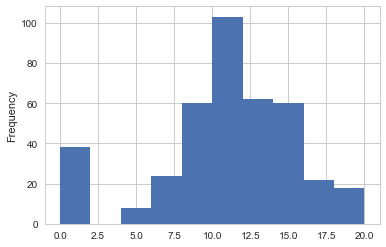

In [219]:
# plot G3 to see the distribution to decide the value for distinguishing class
data_g3['G3'].plot.hist()

In [220]:
data_g3['G3'] = np.where(data_g3['G3']>= 11, 1, 0)
df_y = data_g3['G3']
df_y.head()


0    0
1    0
2    0
3    1
4    0
Name: G3, dtype: int32

### Training and testing sets

In [221]:
X_train,X_test,y_train,y_test = train_test_split(df_X,df_y,test_size=0.3, random_state = 2)

###  SVM Kernels

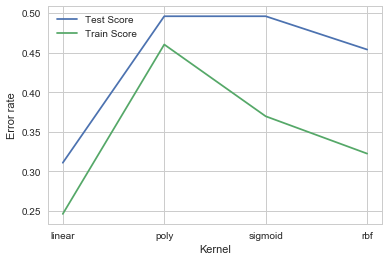

In [222]:
kernel = ['linear', 'poly', 'sigmoid', 'rbf']
error_test = []
error_train = []

for i in range(0, len(kernel)):
    clf_svc = SVC(kernel = kernel[i], random_state = 111)
    clf_svc.fit(X_train, y_train)

    error_test.append(zero_one_loss(y_test, clf_svc.predict(X_test)))
    error_train.append(zero_one_loss(y_train, clf_svc.predict(X_train)))


sns.set(style="whitegrid")


plt.plot(kernel, error_test)
plt.plot(kernel, error_train)
plt.xlabel('Kernel')
plt.ylabel('Error rate')

plt.legend(['Test Score', 'Train Score'])

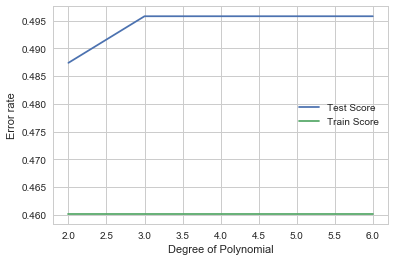

In [223]:
degrees = [2, 3, 4, 5, 6]
error_test_poly = []
error_train_poly = []

for i in range(0, len(degrees)):
    clf_svc_poly = SVC(kernel='poly', degree = degrees[i], random_state = 111)
    clf_svc_poly.fit(X_train, y_train)

    error_test_poly.append(zero_one_loss(y_test, clf_svc_poly.predict(X_test)))
    error_train_poly.append(zero_one_loss(y_train, clf_svc_poly.predict(X_train)))

sns.set(style="whitegrid")


plt.plot(degrees, error_test_poly)
plt.plot(degrees, error_train_poly)

plt.xlabel('Degree of Polynomial')
plt.ylabel('Error rate')

plt.legend(['Test Score', 'Train Score'])

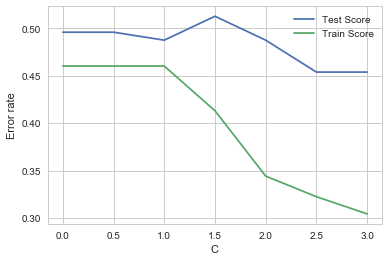

In [224]:
c = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1, 1.5, 2, 2.5, 3]
error_test_penalty = []
error_train_penalty = []

for i in range(0, len(c)):
    clf_svc_penalty = SVC(kernel='poly', degree = 2, C = c[i], random_state = 111)
    clf_svc_penalty.fit(X_train, y_train)

    error_test_penalty.append(zero_one_loss(y_test, clf_svc_penalty.predict(X_test)))
    error_train_penalty.append(zero_one_loss(y_train, clf_svc_penalty.predict(X_train)))

sns.set(style="whitegrid")


plt.plot(c, error_test_penalty)
plt.plot(c, error_train_penalty)

plt.xlabel('C')
plt.ylabel('Error rate')

plt.legend(['Test Score', 'Train Score'])

In [226]:
clf_svc_linear_c = SVC(kernel='linear', random_state = 111)
clf_svc_linear_c.fit(X_train, y_train)
y_pred_linear_c = clf_svc_linear_c.predict(X_test) 
print(confusion_matrix(y_test,y_pred_linear_c))  
print(classification_report(y_test,y_pred_linear_c))

[[35 24]
 [13 47]]
             precision    recall  f1-score   support

          0       0.73      0.59      0.65        59
          1       0.66      0.78      0.72        60

avg / total       0.70      0.69      0.69       119



### Decision Trees

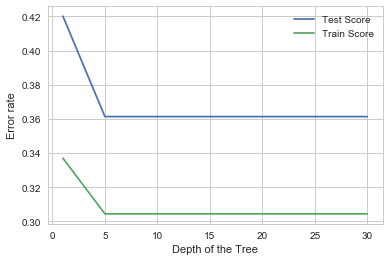

In [227]:
depths = [1, 5, 10, 15, 20, 22, 24, 26, 28, 30]
error_test_tree = []
error_train_tree = []

for i in range(0, len(depths)):
    dtree = DecisionTreeClassifier(max_depth = depths[i], min_samples_split = 50, min_samples_leaf = 30, random_state = 2) # minimum 50 samples required to split the node
    dtree = dtree.fit(X_train, y_train)
    
    error_test_tree.append(zero_one_loss(y_test, dtree.predict(X_test)))
    error_train_tree.append(zero_one_loss(y_train, dtree.predict(X_train)))

plt.plot(depths, error_test_tree)
plt.plot(depths, error_train_tree)

plt.xlabel('Depth of the Tree')
plt.ylabel('Error rate')
plt.legend(['Test Score', 'Train Score'])

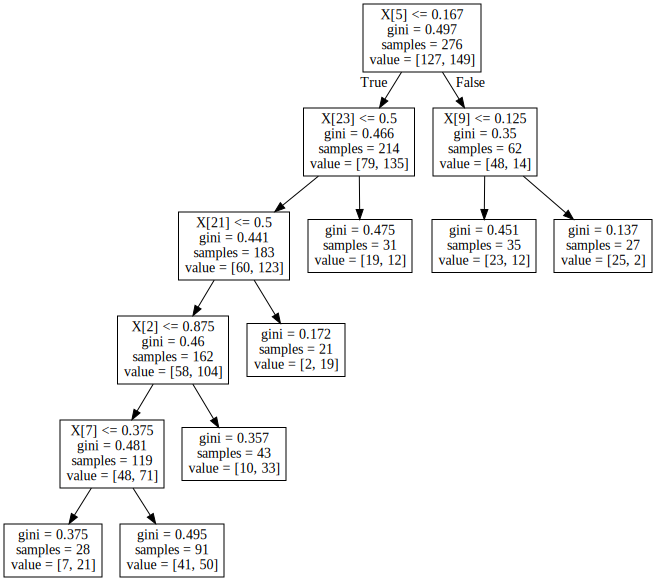

In [228]:
dtree = DecisionTreeClassifier(max_depth = 5, min_samples_split = 50, min_samples_leaf = 20, random_state = 2)
dtree = dtree.fit(X_train, y_train)
                     
dot_data = tree.export_graphviz(dtree, out_file=None) 
                         
graph = graphviz.Source(dot_data)
graph

In [229]:
dtree1 = DecisionTreeClassifier(max_depth = 5, min_samples_split = 50, min_samples_leaf = 20, random_state = 2)
dtree1.fit(X_train, y_train)
y_pred_dtree1 = dtree1.predict(X_test) 
print(confusion_matrix(y_test,y_pred_dtree1))  
print(classification_report(y_test,y_pred_dtree1))

[[24 35]
 [10 50]]
             precision    recall  f1-score   support

          0       0.71      0.41      0.52        59
          1       0.59      0.83      0.69        60

avg / total       0.65      0.62      0.60       119



### Boosting

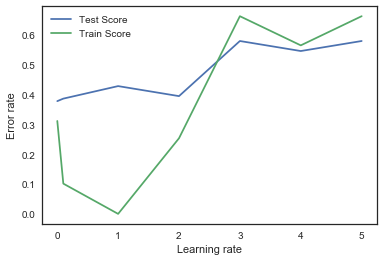

In [230]:
learning_rate = [0.001, 0.1, 1, 2, 3, 4, 5]
error_test_boost = []
error_train_boost = []

for i in range(0, len(learning_rate)):
    clf_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 5, min_samples_split = 50, min_samples_leaf = 20), algorithm='SAMME.R', learning_rate = learning_rate[i])
    clf_ada = clf_ada.fit(X_train, y_train)
    
    error_test_boost.append(zero_one_loss(y_test, clf_ada.predict(X_test)))
    error_train_boost.append(zero_one_loss(y_train, clf_ada.predict(X_train)))
    
    

sns.set(style="white")

plt.plot(learning_rate, error_test_boost)
plt.plot(learning_rate, error_train_boost)

plt.xlabel('Learning rate')
plt.ylabel('Error rate')

plt.legend(['Test Score', 'Train Score'])

In [231]:
boost1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 5, min_samples_split = 50, min_samples_leaf = 20), algorithm='SAMME.R', learning_rate = learning_rate[i])
boost1.fit(X_train, y_train)
y_pred_boost1 = boost1.predict(X_test) 
print(confusion_matrix(y_test,y_pred_boost1))  
print(classification_report(y_test,y_pred_boost1))

[[44 15]
 [54  6]]
             precision    recall  f1-score   support

          0       0.45      0.75      0.56        59
          1       0.29      0.10      0.15        60

avg / total       0.37      0.42      0.35       119



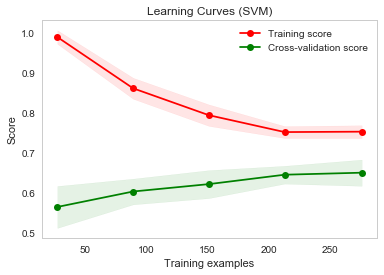

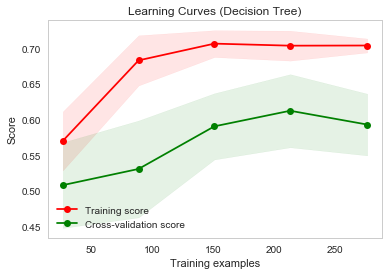

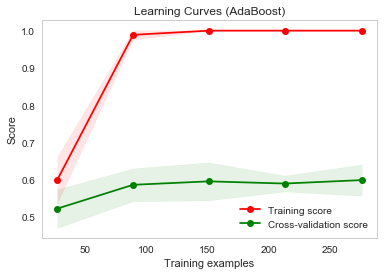

In [178]:
X, y = df_X, df_y

title = "Learning Curves (SVM)"
cv = ShuffleSplit(n_splits=10, test_size=0.3)

estimator = SVC(kernel = 'linear', random_state = 121)
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

title = "Learning Curves (Decision Tree)"

cv = ShuffleSplit(n_splits=10, test_size=0.3)
estimator = DecisionTreeClassifier(max_depth = 5, min_samples_split = 50, min_samples_leaf = 20)
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

title = "Learning Curves (AdaBoost)"

cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
estimator = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 5, min_samples_split = 50, min_samples_leaf = 20), algorithm='SAMME.R', learning_rate = 1)
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)


plt.show()

### DATASET 2: ONLINE NEWS POPULARITY

In [232]:
raw_data2 = pd.read_csv("OnlineNewsPopularity.csv")
raw_data2.columns = raw_data2.columns.str.strip()

raw_data2.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [233]:
data2 = raw_data2.drop('url', axis=1)
data2 = data2.drop('timedelta', axis=1)
data2.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


(1, 10000)

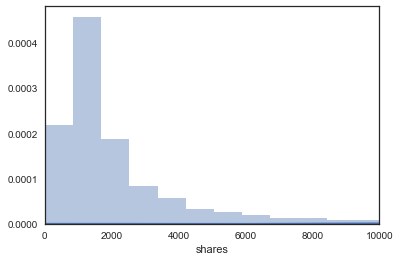

In [234]:
distn = sns.distplot(data2['shares'], bins = 1000)
distn.set_xlim(1, 10000)

In [235]:
data2['shares'] = np.where(data2['shares'] >= 1500, 1, 0)

In [236]:
data2.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0


In [237]:
df_X = data2.drop(['shares'],axis=1)
df_X.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [238]:
df_y = data2['shares']
df_y.head()

0    0
1    0
2    1
3    0
4    0
Name: shares, dtype: int32

In [204]:
scaler = MinMaxScaler()
scaler.fit(df_X)
df_X =np.array(scaler.transform(df_X))

### Training and testing sets

In [205]:
#Train and test splits
X_train,X_test,y_train,y_test = train_test_split(df_X,df_y,test_size=0.3, random_state = 5)
y_train = np.array(y_train).flatten()                               
y_test = np.array(y_test).flatten()


### SVM Kernels

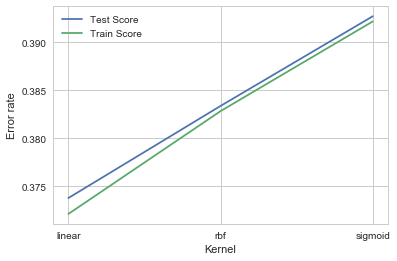

In [189]:
kernel = ['linear', 'rbf', 'sigmoid']
error_test = []
error_train = []

for i in range(0, len(kernel)):
    clf_svc = SVC(kernel = kernel[i], random_state = 111)
    clf_svc.fit(X_train, y_train)

    error_test.append(zero_one_loss(y_test, clf_svc.predict(X_test)))
    error_train.append(zero_one_loss(y_train, clf_svc.predict(X_train)))


sns.set(style="whitegrid")


plt.plot(kernel, error_test)
plt.plot(kernel, error_train)
plt.xlabel('Kernel')
plt.ylabel('Error rate')

plt.legend(['Test Score', 'Train Score'])

In [190]:
clf_svc_2 = SVC(kernel='linear', random_state = 111)
clf_svc_2.fit(X_train, y_train)
y_pred_2 = clf_svc_2.predict(X_test) 
print(confusion_matrix(y_test,y_pred_2))  
print(classification_report(y_test,y_pred_2))

[[3908 2179]
 [2267 3540]]
             precision    recall  f1-score   support

          0       0.63      0.64      0.64      6087
          1       0.62      0.61      0.61      5807

avg / total       0.63      0.63      0.63     11894



### Decision Trees

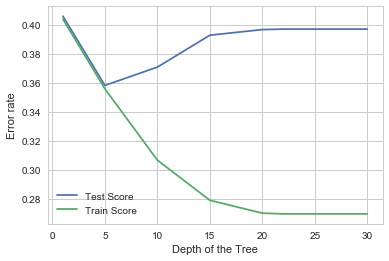

In [191]:
depths = [1, 5, 10, 15, 20, 22, 24, 26, 28, 30]
error_test_tree2 = []
error_train_tree2 = []

for i in range(0, len(depths)):
    dtree2 = DecisionTreeClassifier(max_depth = depths[i], min_samples_split = 50, min_samples_leaf = 30, random_state = 2) # minimum 50 samples required to split the node
    dtree2 = dtree2.fit(X_train, y_train)
    
    error_test_tree2.append(zero_one_loss(y_test, dtree2.predict(X_test)))
    error_train_tree2.append(zero_one_loss(y_train, dtree2.predict(X_train)))

plt.plot(depths, error_test_tree2)
plt.plot(depths, error_train_tree2)

plt.xlabel('Depth of the Tree')
plt.ylabel('Error rate')
plt.legend(['Test Score', 'Train Score'])

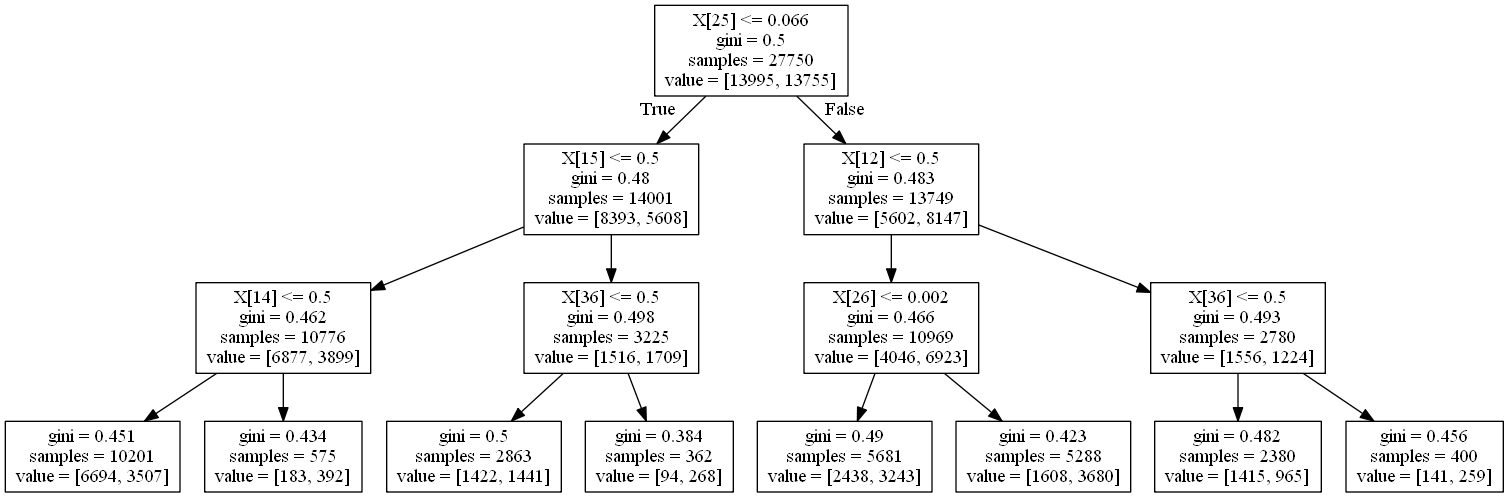

In [160]:
dtree2 = DecisionTreeClassifier(max_depth = 3, min_samples_split = 50, min_samples_leaf = 20, random_state = 2)
dtree2 = dtree2.fit(X_train, y_train)
                     
dot_data2 = tree.export_graphviz(dtree2, out_file=None) 


graph2 = graphviz.Source(dot_data2)
graph2  #not good vizualization here

tree.export_graphviz(dtree2, out_file='dtree2.dot') #cmd line (wroking directory): dot -Tpng dtree.dot -o dtree.png
Image('dtree2.png') 

In [195]:
dtree2 = DecisionTreeClassifier(max_depth = 3, min_samples_split = 50, min_samples_leaf = 20, random_state = 2)
dtree2.fit(X_train, y_train)
y_pred_dtree2 = dtree2.predict(X_test) 
print(confusion_matrix(y_test,y_pred_dtree2))  
print(classification_report(y_test,y_pred_dtree2))

[[3515 2572]
 [1855 3952]]
             precision    recall  f1-score   support

          0       0.65      0.58      0.61      6087
          1       0.61      0.68      0.64      5807

avg / total       0.63      0.63      0.63     11894



### Boosting

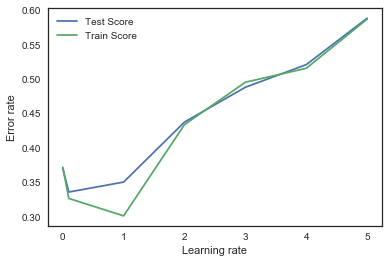

In [192]:
learning_rate = [0.001, 0.1, 1, 2, 3, 4, 5]
error_test_boost2 = []
error_train_boost2 = []

for i in range(0, len(learning_rate)):
    clf_ada2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 3, min_samples_split = 50, min_samples_leaf = 20), algorithm='SAMME.R', learning_rate = learning_rate[i])
    clf_ada2 = clf_ada2.fit(X_train, y_train)
    
    error_test_boost2.append(zero_one_loss(y_test, clf_ada2.predict(X_test)))
    error_train_boost2.append(zero_one_loss(y_train, clf_ada2.predict(X_train)))
    
    

sns.set(style="white")

plt.plot(learning_rate, error_test_boost2)
plt.plot(learning_rate, error_train_boost2)

plt.xlabel('Learning rate')
plt.ylabel('Error rate')

plt.legend(['Test Score', 'Train Score'])

In [196]:
boost2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 3, min_samples_split = 50, min_samples_leaf = 20), algorithm='SAMME.R', learning_rate = learning_rate[i])
boost2.fit(X_train, y_train)
y_pred_boost2 = boost2.predict(X_test) 
print(confusion_matrix(y_test,y_pred_boost2))  
print(classification_report(y_test,y_pred_boost2))

[[2576 3511]
 [3487 2320]]
             precision    recall  f1-score   support

          0       0.42      0.42      0.42      6087
          1       0.40      0.40      0.40      5807

avg / total       0.41      0.41      0.41     11894



### Learning Curves

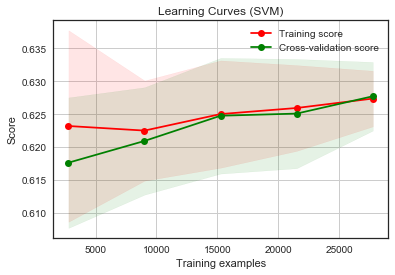

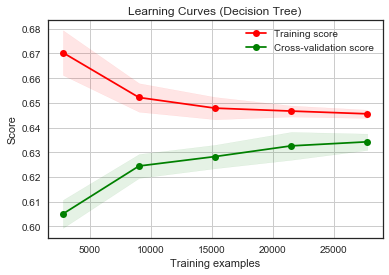

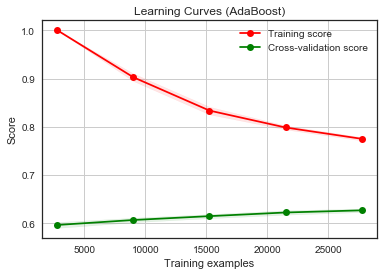

In [206]:
X, y = df_X, df_y


title = "Learning Curves (SVM)"
cv = ShuffleSplit(n_splits=10, test_size=0.3)

estimator = SVC(kernel = 'linear', random_state = 121)
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

title = "Learning Curves (Decision Tree)"

cv = ShuffleSplit(n_splits=10, test_size=0.3)
estimator = DecisionTreeClassifier(max_depth = 5, min_samples_split = 50, min_samples_leaf = 20)
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

title = "Learning Curves (AdaBoost)"

cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
estimator = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 5, min_samples_split = 50, min_samples_leaf = 20), algorithm='SAMME.R', learning_rate = 1)
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)


plt.show()

##### THANK YOU!